# Linear Regression on photo brightness

In [10]:
#imports
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [11]:
#Load data
data_file = "brightArr.npy"
label_file = "labelsArr.npy"
X = np.load(data_file)
y = np.load(label_file)
# y = np.random.randint(6, size = X.shape)

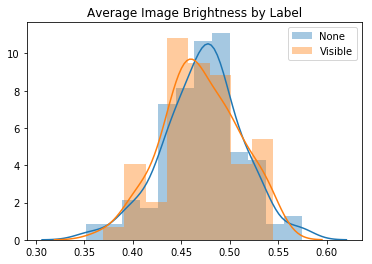

In [12]:
plt.figure()
plt.title("Average Image Brightness by Label")
sns.distplot(X[y==1], label="None")
sns.distplot(X[y==2], label="Visible")
plt.legend()
plt.show()

In [13]:
#Run linear regression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_) 


0.0006910204247342344
[-0.31589881]
1.4959944077537748


In [57]:
sum(y == -1)

0

0.471936045553689

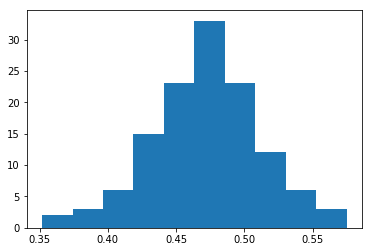

In [58]:
plt.hist(X[y==1])
np.mean(X[y==1])

0.4697485716022825

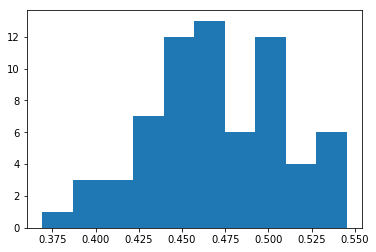

In [61]:
plt.hist(X[y==2])
np.mean(X[y==2])

In [62]:
pred_Y

array([0.28499791, 0.33876385, 0.31864107, 0.30911671, 0.2974227 ,
       0.29049646, 0.31308013, 0.31696541, 0.31348656, 0.30779032,
       0.28705028, 0.28854565, 0.26052117, 0.30699587, 0.28521623,
       0.30323503, 0.29064884, 0.34462161, 0.23036116, 0.26609422,
       0.29343614, 0.33589732, 0.31026048, 0.26260275, 0.32347756,
       0.31469756, 0.28663498, 0.29632204, 0.33738475, 0.31018028,
       0.30903426, 0.3050025 , 0.31395029, 0.32033805, 0.3445927 ,
       0.29793938, 0.28683823, 0.3292887 , 0.30271582, 0.30758751,
       0.30470436, 0.33349192, 0.28482313, 0.3213584 , 0.27843808,
       0.34197978, 0.31472864, 0.3248854 , 0.32295794, 0.32806121,
       0.31691229, 0.32026623, 0.3111273 , 0.25240063, 0.29278954,
       0.29372638, 0.31421683, 0.31062041, 0.32086487, 0.28054652,
       0.30782409, 0.37113831, 0.27325387, 0.29806136, 0.25375158,
       0.3066363 , 0.32255684, 0.30315931, 0.34360289, 0.26991915,
       0.3006861 , 0.28255924, 0.27866742, 0.31170659, 0.31778

[0, 1]


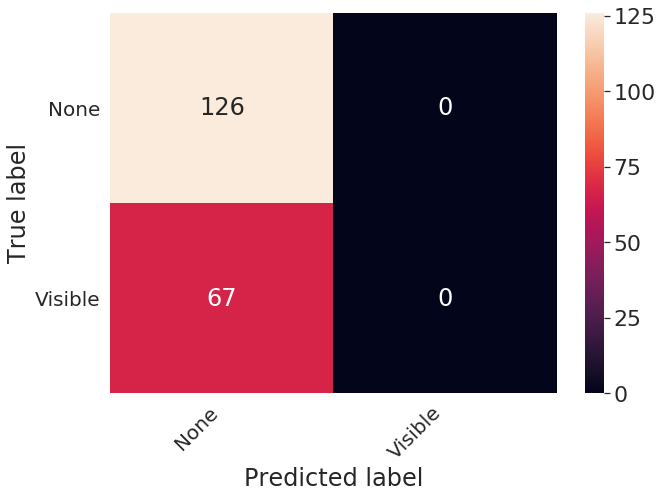

In [28]:
pred_Y = np.round(reg.predict(X))
#y = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4]
#pred_y = [1,2,1,2,1,2,1,2,1,1,1,1,4,3,3,3,3,4,4]
cmat = metrics.confusion_matrix(y, pred_Y)
print_confusion_matrix(cmat, fontsize=20, labels=["None", "Visible"]);

In [26]:
def print_confusion_matrix(confusion_matrix, class_names = None, figsize = (10,7), fontsize=14, labels=None):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    sns.set(font_scale=2)
    if class_names == None:
        class_names = list(np.arange(len(confusion_matrix)))
        
    print(class_names)
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", )
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    
    if labels:
        heatmap.yaxis.set_ticklabels(labels, rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(labels, rotation=45, ha='right', fontsize=fontsize)
    else:
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [42]:
np.arange(len(cmat))

array([0, 1, 2, 3])